# TP5
## 1
Pretende-se avaliar o impacto que o orçamento em publicidade em três canais (youtube, facebook e newsletter) têm sobre as vendas de uma empresa. Os dados disponíveis são o orçamento em publicidade em milhares de dólares e o montante das vendas. A publicidade em cada um dos canais foi repetida 200 vezes com diferentes orçamentos e as vendas observadas foram recolhidas. O
objetivo é prever as vendas futuras da empresa usando modelos de regressão lineares e árvores de regressão.

In [1]:
# from statistics import LinearRegression

from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
ficheiro = "../../ficheiros/Parte 2/Advertising.csv"

### a)
Comece por carregar o dataset “Advertising.csv”.

In [3]:
dados_lidos = pd.read_csv(ficheiro, usecols=[1,2,3,4])

### b)
Analise os dados.

In [4]:
dados_lidos

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
dados_lidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
dados_lidos.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
dados_lidos.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Contagem de valores nulos.

In [14]:
dados_lidos.isnull().sum()*100/dados_lidos.shape[0]

TV           0.0
radio        0.0
newspaper    0.0
sales        0.0
dtype: float64

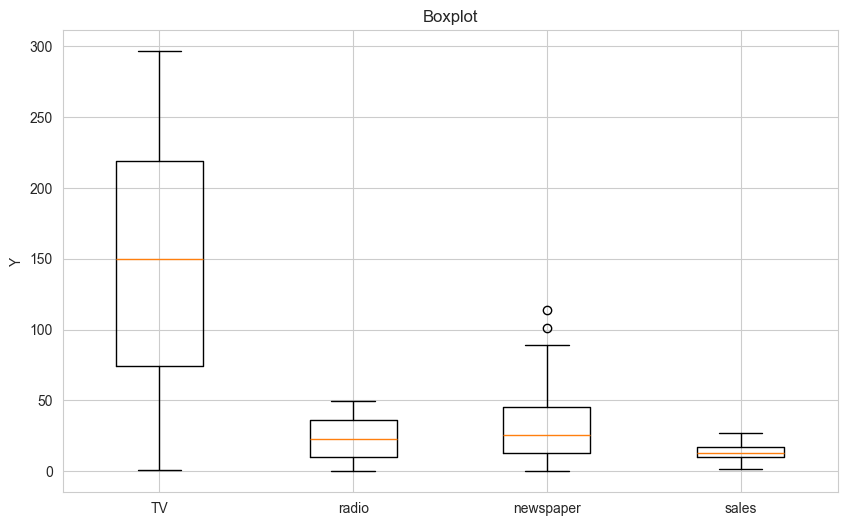

In [7]:
# Boxplot para ver os outliers
fig_boxplot, axes_boxplot = plt.subplots(figsize = (10,6))
axes_boxplot.set_title("Boxplot")
axes_boxplot.set_ylabel("Y")

_ = axes_boxplot.boxplot(dados_lidos, labels = dados_lidos.columns)


# Scatterplot

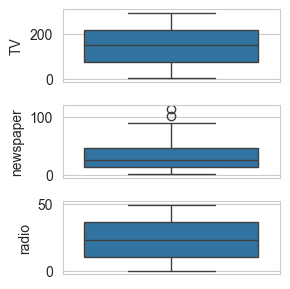

In [19]:
fig_box, axes_box = plt.subplots(3, figsize = (3, 3))
plt1 = sns.boxplot(data = dados_lidos["TV"], ax = axes_box[0])
plt2 = sns.boxplot(data = dados_lidos["newspaper"], ax = axes_box[1])
plt3 = sns.boxplot(data = dados_lidos["radio"], ax = axes_box[2])
plt.tight_layout()

#### Pair-plot

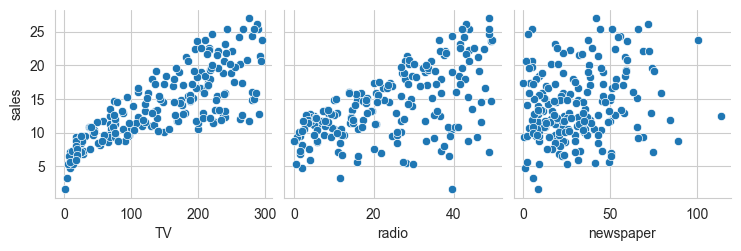

In [20]:
sns.pairplot(data=dados_lidos, x_vars=["TV", "radio", "newspaper"], y_vars="sales")

In [9]:
correlacao = dados_lidos.corr()
print(correlacao)

                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000


<Axes: >

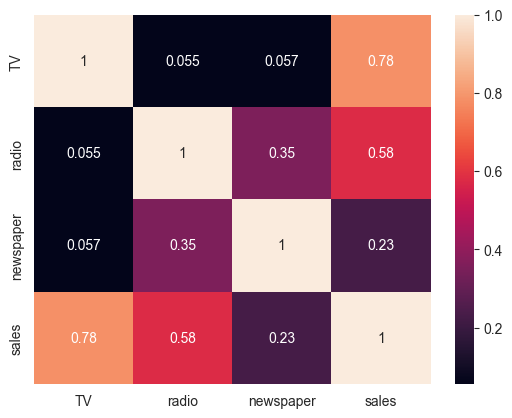

In [10]:
sns.heatmap(correlacao, annot=True)

### c)
Separe o conjunto de dados inicial em dois subconjuntos treino e teste, segundo o critério holdout (70% treino/30% teste).

In [11]:
# Holdout
X = dados_lidos[["TV"]].to_numpy()
y = dados_lidos.sales

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# print(... cada uma das vars)
print(f"Quantidade de registoa X para treino: {len(X_train)}")
print(f"Quantidade de registoa X para treino: {len(y_train)}")
print(f"Quantidade de registoa X para teste: {len(X_test)}")
print(f"Quantidade de registoa X para teste: {len(y_test)}")

# ...


Quantidade de registoa X para treino: 140
Quantidade de registoa X para treino: 140
Quantidade de registoa X para teste: 60
Quantidade de registoa X para teste: 60


### d)
Obtenha um modelo de regressão linear simples usando apenas um dos canais de publicidade.

#### i
Apresente a função linear resultante.

In [12]:
# Iniciar o algoritmo
regr = LinearRegression()

# fit the data
regr.fit(X_train, y_train)

print("Eq. da reta: y=", regr.intercept_, "+", regr.coef_, "")

### Evaluate the model
from sklearn.metrics import r2_score, mean_absolute_error, mena_squared_error

y_pred = regr.predict(X_test)

MAE = np.mean(abs(y_test - y_pred))
print(MAE)

...


Eq. da reta: y= 6.98966585741168 + [0.04649736] 


ImportError: cannot import name 'mena_squared_error' from 'sklearn.metrics' (D:\Desenvolvimento\Repositorios\pessoais\anadi_2024\venv\Lib\site-packages\sklearn\metrics\__init__.py)

#### ii.
Visualize a reta correspondente ao modelo de regressão linear simples e o respetivo diagrama de dispersão.

#### iii.
Calcule o erro médio absoluto (MAE) e raiz quadrada do erro médio (RMSE) do modelo sobre os 30% casos de teste.

### e)
Repita as alíneas anteriores, com um modelo de regressão linear múltipla usando os três canais.

In [ ]:
X = dados_lidos

### f)
Simplifique o modelo.

In [ ]:
# É aplicar o algoritmo, mas sem preditores que não sejam lienares.

#### g)
Obtenha a árvore de regressão usando a função DecisionTreeRegressor() da Scikit-Learn para prever as vendas futuras da empresa em função dos orçamentos em publicidade nos três canais.

### h)
Visualize a árvore de decisão.

Arvores de decisão

Aplicam-se a problemas de classificação e de regressão.

sklearn.tree.DecisionTreeRegressor


MAE e RMSE


### i)
Calcule o erro médio absoluto (MAE) e raiz quadrada do erro médio (RMSE) da árvore de regressão sobre o conjunto de teste.